In [1]:
# Print out WSL shell environment vars passed to jupyter notebook
ENV
# ENV["BROWSER"]

Base.EnvDict with 26 entries:
  "SHELL"              => "/bin/bash"
  "WSL_DISTRO_NAME"    => "Ubuntu"
  "NAME"               => "DESKTOP-A1AUCQ6"
  "PWD"                => "/home/kkganko"
  "LOGNAME"            => "kkganko"
  "MOTD_SHOWN"         => "update-motd"
  "HOME"               => "/home/kkganko"
  "LANG"               => "C.UTF-8"
  "WSL_INTEROP"        => "/run/WSL/1703_interop"
  "LS_COLORS"          => "rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01…
  "LESSCLOSE"          => "/usr/bin/lesspipe %s %s"
  "TERM"               => "xterm-256color"
  "LESSOPEN"           => "| /usr/bin/lesspipe %s"
  "USER"               => "kkganko"
  "SHLVL"              => "1"
  "WSLENV"             => ""
  "XDG_DATA_DIRS"      => "/usr/local/share:/usr/share:/var/lib/snapd/desktop"
  "BROWSER"            => "/mnt/c/Program\\ Files\\ \\(x86\\)/Microsoft/Edge/Ap…
  "PATH"               => "/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/s…
  "HOSTTYPE"           => "x86_64"
  "OLDPWD

In [2]:
import Pkg

In [3]:
# Pkg.add("IJulia")
# Pkg.add("Conda")
# Pkg.add("PyCall")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("JLD") # for loading and saving Julia variables using .jld file format
# Pkg.add("LaTeXStrings") # for using latex math fonts in plots, prepend L to strings, ie. L"5+5"
# Pkg.add("SpecialFunctions") # for getting Beta function and error function + complementary error function values given inputs
# Pkg.add("BenchmarkTools") # for performance tracking, https://github.com/JuliaCI/BenchmarkTools.jl

using Printf # for pretty string formatting of variables
using Random # for setting random seeds
using IJulia
using Conda
using PyCall
using Plots
using Plots; pyplot(html_output_format=:png)
using JLD
using LaTeXStrings
using SpecialFunctions
using LinearAlgebra # holds LowerTriangular() matrix generator plus other nifty Linpack routines
using BenchmarkTools

1×3 Matrix{String}:
 "hi"  "hi"  "hi"

0.07
$5+5$
$\mathrm{My\, \alpha\, including\, a\, variable\, date:\,}07-08-2018$


L"$\textrm{My date is } 07-08-2018$"

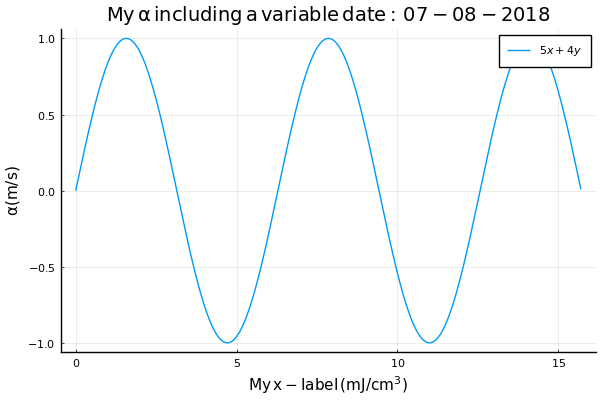

In [4]:
# Test if normal commands are working in this notebook
display("text/plain", ["hi" "hi" "hi"])
Random.seed!(1) # set random seed for runs going forward
testtest = rand() # should be reproducible random number at this point
actual_label = "$(@sprintf("%.2f", testtest))" # pretty formatting
println(actual_label)

# Test if Latex is working fine, can either prepend L to strings or use latexstring function (PREFERRED).
# NOT WORKING IN GR()! See more discussion about issues with gr() backend at 
# https://discourse.julialang.org/t/latex-code-for-titles-labels-with-plots-jl/1967/17
println(L"5+5")
date = "07-08-2018"
titlestring = latexstring("\\mathrm{My\\, \\alpha\\, including\\, a\\, variable\\, date:\\,}", date)
println(titlestring)
display(L"\textrm{My date is } %$(date)")
plot(sin, (0:0.01:5*pi), title = titlestring, xlabel = L"\mathrm{My\, x-label\, (mJ/cm^{3})}", 
    ylabel = L"\mathrm{\alpha (m/s)}", label = latexstring("5x+4y"))

# Testing PyClaw Usage through PyCall #

In [5]:
run(`echo Hello World`)

Hello World


Process(`echo Hello World`, ProcessExited(0))

In [6]:
# # need to set to empty string to force Julia installation to use own mini Python distribution
# ENV["PYTHON"]=""
# ENV
# Pkg.build("PyCall")
println("Conda.jl takes packages from $(Conda.ROOTENV)")
println("PyCall uses python at $(Conda.PYTHONDIR)")
println("More precisely PyCall runs using packages at $(PyCall.pyprogramname)")
# list packages the Conda.jl installed
Conda.list(Conda.ROOTENV)

Conda.jl takes packages from /home/kkganko/.julia/conda/3
PyCall uses python at /home/kkganko/.julia/conda/3/bin
More precisely PyCall runs using packages at /home/kkganko/.julia/conda/3/bin/python


┌ Info: Running `conda list` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


# packages in environment at /home/kkganko/.julia/conda/3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     3.6.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39hb9d737c_2    conda-forge
asttokens                 2.0.8              pyhd8ed1ab_0    conda-forge
attrs                     22.1.0             pyh71513ae_1    conda-forge
babel                     2.10.3             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.11.1             pyha770c72_0    cond

zstd                      1.5.2                h6239696_4    conda-forge


In [5]:
# only need to run once
# Conda.add("clawpack")

┌ Info: Running `conda install -y clawpack` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


Solving environment: ...working... done

## Package Plan ##

  environment location: /home/kkganko/.julia/conda/3

  added / updated specs:
    - clawpack


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h166bdaf_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h166bdaf_7          19 KB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    clawpack-5.8.2             |   py39h75842be_3         2.4 MB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fftw-3.3.10                |mpi_mpich_hde2e182_3         6.6 MB  conda-forge
    fonttools-4.37.1           |   py39hb9d737c_0         1.9 MB  conda-



mumps-include-5.2.1  | 23 KB     | #################################### | 100% 
petsc-3.17.4         | 11.3 MB   | #################################### | 100% 
fftw-3.3.10          | 6.6 MB    | #################################### | 100% 
kiwisolver-1.4.4     | 76 KB     | #################################### | 100% 
mpi-1.0              | 4 KB      | #################################### | 100% 
mpfr-4.1.0           | 2.6 MB    | #################################### | 100% 
unicodedata2-14.0.0  | 498 KB    | #################################### | 100% 
libgfortran5-12.1.0  | 1.8 MB    | #################################### | 100% 
cached-property-1.5. | 4 KB      | #################################### | 100% 
cycler-0.11.0        | 10 KB     | #################################### | 100% 
libbrotlienc-1.0.9   | 287 KB    | #################################### | 100% 
zstd-1.5.2           | 448 KB    | #################################### | 100% 
mumps-mpi-5.2.1      | 3.3 MB    | ###

In [7]:
# Checking if PyCall works
math = pyimport("math")
math.sin(math.pi / 4) # returns ≈ 1/√2 = 0.70710678...

0.7071067811865475

In [8]:
# Test using python code directly
# py"..." is equivalent to eval statement in Python (argument is string): https://docs.python.org/3/library/functions.html#eval
# py"""...""" is equivalent to exec statement in Python: https://docs.python.org/3/library/functions.html#exec
py"""
import numpy as np

def sinpi(x):
    return np.sin(np.pi * x)
"""

py"sinpi"(1.0)

1.2246467991473532e-16

# How does PyClaw work? #

First of all, **read the damn documentation, then go looking at the code** (instead of the other way around).

1. You have whole clawpack ecosystem directory downloaded in conda packages directory private to Julia. PyClaw is just one directory.

2. Navigate to some examples file in PyClaw directory. Each example illustrates a different concept or way of posing a problem.

3. Example files are python files. You can import the .py file using PyCall and run the various defined functions within it.

4. For example.py files, almost always the setup() function returns a "claw" Controller-type object with a "setplot" attribute/field which is a function handling plotting arguments.

5. For how to extract info from Controller object at each timeframe in solution, see https://www.clawpack.org/pyclaw/output.html

6. You are saving this info into the FastAcc-HypNumSolver folder.

In [128]:
# Initially got error that some version `GLIBCXX_3.4.30` not found
# https://stackoverflow.com/questions/44773296/libstdc-so-6-version-glibcxx-3-4-20-not-found
# https://github.com/JuliaPy/PyCall.jl/issues/999
# https://github.com/JuliaPy/PyPlot.jl/issues/469
py"""
from clawpack.pyclaw import examples
claw = examples.acoustics_1d.setup()
claw.run()
# print(type(claw))
# print(type(claw.setplot))
# help(claw.plot)
# print(claw.frames[0].q)
print(claw) # looks at __str__ definition
"""

2022-08-30 18:57:41,132 INFO CLAW: Solution 0 computed for time t=0.000000
2022-08-30 18:57:41,139 INFO CLAW: Solution 1 computed for time t=0.100000
2022-08-30 18:57:41,142 INFO CLAW: Solution 2 computed for time t=0.200000
2022-08-30 18:57:41,145 INFO CLAW: Solution 3 computed for time t=0.300000
2022-08-30 18:57:41,147 INFO CLAW: Solution 4 computed for time t=0.400000
2022-08-30 18:57:41,150 INFO CLAW: Solution 5 computed for time t=0.500000
2022-08-30 18:57:41,153 INFO CLAW: Solution 6 computed for time t=0.600000
2022-08-30 18:57:41,156 INFO CLAW: Solution 7 computed for time t=0.700000
2022-08-30 18:57:41,158 INFO CLAW: Solution 8 computed for time t=0.800000
2022-08-30 18:57:41,159 INFO CLAW: Solution 9 computed for time t=0.900000
2022-08-30 18:57:41,161 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = ./_output 
  overwrite = True 
  xclawcmd = xcla

In [151]:
py"""
from clawpack.pyclaw import examples
claw = examples.acoustics_1d.setup()
print(claw.num_output_times)
print(np.linspace(claw.t, claw.tfinal, claw.num_output_times+1))
"""


10
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [150]:
# Julia implementation
examples = pyimport("clawpack.pyclaw.examples")
claw = examples.acoustics_1d.setup()
claw.verbosity = 0 # see for other logging options: https://www.clawpack.org/pyclaw/output.html#outputting-derived-quantities
# claw.t # current timestep for solver
claw.run()

# claw.frames[1].q # access matrices of solution q for n-th frame, length = (1+num_output_times)
# claw.lower # lower bound on grid
# claw.upper # upper bound on grid
# claw.delta # spacing between cell centers / edges
# claw.num_cells # number cells
# claw.centers # cell centers
# claw.num_dim # number of independent non-temporal variables
# claw.problem_data # information on physical constants
# claw.p_edges # cell edges in tuple (DEPRECATED)
# claw.grid.nodes # also cell edges, but not deprecated
# claw.grid.p_edges # also cell edges, but through grid attribute
# claw.num_output_times # number of time steps from IC, so IC timestep + num_output_times thereafter
# claw.output_style # 1 = even spaced timesteps, 2 = supply a list of timesteps,3 = take nstepout number of timesteps between output
# claw.tfinal # final timestep, initial timestep always 0
# claw.num_eqn # number of advection equations that are being solved
# claw.overwrite # true = overwrite previous data in output dir
# claw.solver # which Riemann solver is being used
# claw.keep_copy # true = save list of results on equation states locally


# Plotting in Julia
# ts_list = 
# pressure_p = plot(claw.centers, claw.frames[2].q[1,:])
# velocity_p = plot(claw.centers, claw.frames[2].q[2,:])

0.0

# Run PyClaw examples from python files in WSL Ubuntu distro command line and view them on Chrome browser # 

1. `cd-pyclaw-dir` followed by `cd ./examples/<example_name>/`
2. `julia-python <example_name>.py htmlplot=1` followed by `cd ./_plots/`
3. `explorer.exe _PlotIndex.html` will open in Chrome through WSL shell (be sure NOT to use any path to the file, explorer.exe will not parse it correctly and will instead open Windows Explorer window...)

2022-08-31 19:16:28,583 INFO CLAW: Solution 0 computed for time t=0.000000
2022-08-31 19:16:28,586 INFO CLAW: Solution 1 computed for time t=0.100000
2022-08-31 19:16:28,589 INFO CLAW: Solution 2 computed for time t=0.200000
2022-08-31 19:16:28,591 INFO CLAW: Solution 3 computed for time t=0.300000
2022-08-31 19:16:28,593 INFO CLAW: Solution 4 computed for time t=0.400000
2022-08-31 19:16:28,595 INFO CLAW: Solution 5 computed for time t=0.500000
2022-08-31 19:16:28,598 INFO CLAW: Solution 6 computed for time t=0.600000
2022-08-31 19:16:28,601 INFO CLAW: Solution 7 computed for time t=0.700000
2022-08-31 19:16:28,603 INFO CLAW: Solution 8 computed for time t=0.800000
2022-08-31 19:16:28,605 INFO CLAW: Solution 9 computed for time t=0.900000
2022-08-31 19:16:28,606 INFO CLAW: Solution 10 computed for time t=1.000000


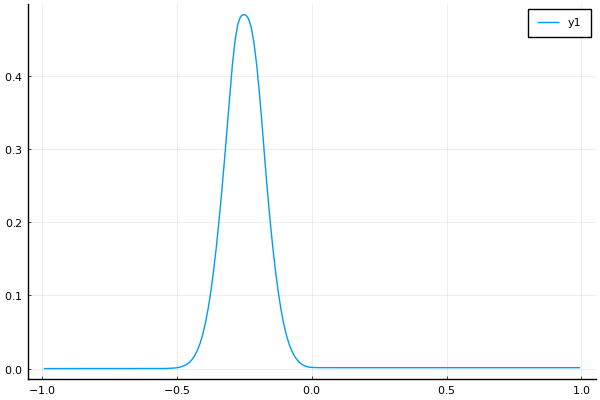

In [268]:
# Solve acoustics equations
# http://www.clawpack.org/pyclaw/tutorial.html#pyclaw-tutorial
py"""
# solver
from clawpack import pyclaw
from clawpack import riemann
solver = pyclaw.ClawSolver1D(riemann.acoustics_1D)
solver.bc_lower[0] = pyclaw.BC.wall
solver.bc_upper[0] = pyclaw.BC.extrap

# domain
domain = pyclaw.Domain([-1.0], [1.0], [200])
solution = pyclaw.Solution(solver.num_eqn, domain)

# initial condition
state = solution.state
xc = state.grid.p_centers[0]

from numpy import exp
state.q[0,:] = exp(-100 * (xc-0.75)**2)
state.q[1,:] = 0.

# parameters
from math import sqrt
rho = 1.0
bulk = 1.0
state.problem_data['rho'] = rho
state.problem_data['bulk'] = bulk
state.problem_data['zz'] = sqrt(rho*bulk)
state.problem_data['cc'] = sqrt(bulk/rho)

# Controller
controller = pyclaw.Controller()
controller.solution = solution
controller.solver = solver
controller.tfinal = 1.0
controller.keep_copy = True

# run
status = controller.run()

# plot NOT WORKING!!
from clawpack.pyclaw import plot
# plot.plot() 
"""

# Just use Julia to plot the desired plots
centers = py"controller.centers"
results = py"controller.frames"
plot(centers,results[end].q[1,:])

In [269]:
py"""
print(controller)
"""

Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = /home/kkganko/FastAcc-HypNumSolver/_output 
  overwrite = True 
  xclawcmd = xclaw 
  xclawout = None 
  xclawerr = None 
  runmake = False 
  savecode = False 
  solver = Solver Status:

                   cflmax = 0.9000000000000001
                    dtmin = 0.009
                    dtmax = 0.009000000000000001
                 numsteps = 120 
  keep_copy = True 
  write_aux_init = False 
  write_aux_always = False 
  output_format = ascii 
  output_file_prefix = None 
  output_options = {} 
  num_output_times = 10 
  output_style = 1 
  verbosity = 3 

  Solver Solver Status:

                   cflmax = 0.9000000000000001
                    dtmin = 0.009
                    dtmax = 0.009000000000000001
                 numsteps = 120
  Frames 
    states:
PyClaw State object
Patch dimensions: [200]
Time  t=0.0
Number of conserved quantities: 2
problem_da

2022-08-31 19:18:39,573 INFO CLAW: Solution 0 computed for time t=0.000000
2022-08-31 19:18:39,575 INFO CLAW: Solution 1 computed for time t=0.100000
2022-08-31 19:18:39,577 INFO CLAW: Solution 2 computed for time t=0.200000
2022-08-31 19:18:39,579 INFO CLAW: Solution 3 computed for time t=0.300000
2022-08-31 19:18:39,581 INFO CLAW: Solution 4 computed for time t=0.400000
2022-08-31 19:18:39,584 INFO CLAW: Solution 5 computed for time t=0.500000
2022-08-31 19:18:39,586 INFO CLAW: Solution 6 computed for time t=0.600000
2022-08-31 19:18:39,588 INFO CLAW: Solution 7 computed for time t=0.700000
2022-08-31 19:18:39,593 INFO CLAW: Solution 8 computed for time t=0.800000
2022-08-31 19:18:39,595 INFO CLAW: Solution 9 computed for time t=0.900000
2022-08-31 19:18:39,597 INFO CLAW: Solution 10 computed for time t=1.000000


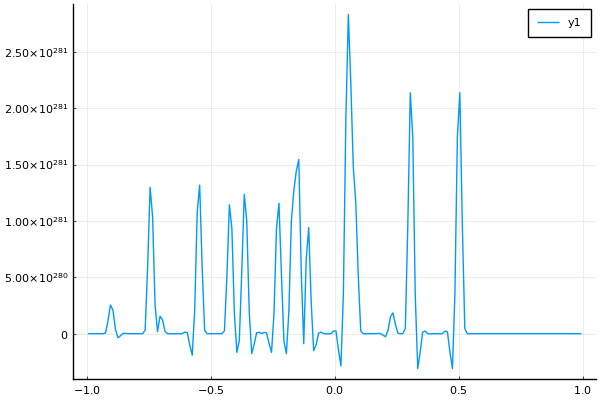

In [274]:
# Try running Julia version of above solver

# solver
pyclaw = pyimport("clawpack.pyclaw")
riemann = pyimport("clawpack.riemann")
solver = pyclaw.ClawSolver1D(riemann.acoustics_1D)
solver.bc_lower = [pyclaw.BC.periodic]
solver.bc_upper = [pyclaw.BC.periodic]
# println(solver.num_eqn) # choice of solver determines num_eqn immediately

# domain
domain = pyclaw.Domain([-1.0], [1.0], [200])
solution = pyclaw.Solution(solver.num_eqn, domain)

# initial condition
state = solution.state
xc = state.grid.p_centers[1]

beta = 100
gamma = 0
x0 = 0.75
state.q[1, :] = exp.(-beta .* (xc .- x0).^2) .* cos.(gamma .* (xc .- x0))
state.q[2,:] .= zeros(length(state.q[2,:]))

# parameters
rho = 1.0
bulk = 1.0
# The following specification of key-value pairs in Julia doesn't work since you are assigning 
# them not directly but to an attribute of the state object
# state.problem_data["rho"] = rho
# state.problem_data["bulk"] = bulk
# state.problem_data["zz"] = sqrt(rho*bulk)
# state.problem_data["cc"] = sqrt(bulk/rho)
state.problem_data = Dict("rho" => rho, "bulk" => bulk, "zz" => sqrt(rho*bulk), "cc" => sqrt(bulk/rho))

# Controller
solver.dt_initial = domain.grid.delta[1] / state.problem_data["cc"] * 0.001
controller = pyclaw.Controller()
controller.solution = solution
controller.solver = solver
controller.tfinal = 1.0
controller.num_output_times = 10
controller.keep_copy = true # need to set this in Julia version to save data locally

# run
status = controller.run()

# plot
plot(controller.centers, controller.frames[2].q[1,:])
# plot(controller.centers, exp.(-100 .* (xc.-0.75).^2))


## Conclusion on PyClaw Tests: pure Julia cannot handle it, simply run in Python or be very pedantic about specifying all possible function arguments in Julia, but plot in Julia by exporting results using `py"<statement>"` ##

## 08/31/22 ##

Plan:

1. Modify 1D acoustics example with relevant domain (uniform and boundaries), time-step, and WENO solver from Sharpclaw.
2. Boundary Condition at inflow should be homogeneous Dirichlet, known as **nonreflecting** or **absorbing** BCs in LeVeque's textbook (see ch8), the equivalent of a **non-wall** or **zero-order extrapolation** (the ghost cells = value of cell closest to boundary). On the other hand, **wall-type** BCs are **reflecting** are modeled by creating symmetry about the boundary with the domain and visualizing a wave flowing in that is equivalent to reflection of the wave current in the domain and hitting the boundary. Wall-type boundaries are also analogous to no-slip boundaries in fluid mechanics.
3. Add in a source term. First try linear homogeneous and then full rigour with trapz function evaluated at midpoint of each 1D cell.
4. Run and plot.

In [276]:
Conda.add("numpy")

┌ Info: Running `conda install -y numpy` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


Solving environment: ...working... done

## Package Plan ##

  environment location: /home/kkganko/.julia/conda/3

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |     pyhd8ed1ab_1         154 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         154 KB

The following packages will be UPDATED:

  certifi            conda-forge/linux-64::certifi-2022.6.~ --> conda-forge/noarch::certifi-2022.6.15-pyhd8ed1ab_1



certifi-2022.6.15    | 154 KB    | #################################### | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done


In [32]:
# Define constants to use but potentially change
# physical parameters
py"""
import numpy as np

m_c = 50.0 # critical fissioning cell mass, kg
sigma_m = 10.0 # fissioning cell mass spread, kg
M = 4*m_c # maximal mass possible by any cell, kg
dm_dx = M/2 # conversion ratio for linear transform to chebyshev domain, i.e., m=\in[0,M] -> x\in[-1,1], kg
mu_0 = 25.0 # initial cell mass distribution mean, kg
sigma_0 = np.sqrt(2.5) # initial cell mass distribution standard deviation, kg
k_0 = 2.0 # growth rate, kg/s
N_00 = 1.0e6 # initial number of total cells

# numerical parameters
tf = 100.0 # total time of simulating MOL or spectral coeff-based method, s
N_m = 1000 # number of grid points to select in mass domain
"""

In [340]:
# Test advection_1d example
py"""
from clawpack.pyclaw import examples
# help(examples) # gives list of available modules / examples
claw = examples.advection_1d.setup()
print(claw)
claw.run()
# print(type(claw))
# print(type(claw.setplot))
# help(claw.plot)
# print(claw.frames[0].q)
print(claw) # looks at __str__ definition
"""

Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = ./_output 
  overwrite = True 
  xclawcmd = xclaw 
  xclawout = None 
  xclawerr = None 
  runmake = False 
  savecode = False 
  solver = Solver Status:

                   cflmax = -inf
                    dtmin = inf
                    dtmax = -inf
                 numsteps = 0 
  keep_copy = True 
  write_aux_init = False 
  write_aux_always = False 
  output_format = ascii 
  output_file_prefix = None 
  output_options = {} 
  num_output_times = 10 
  output_style = 1 
  verbosity = 3 

  Solver Solver Status:

                   cflmax = -inf
                    dtmin = inf
                    dtmax = -inf
                 numsteps = 0

2022-08-31 20:30:07,959 INFO CLAW: Solution 0 computed for time t=0.000000
2022-08-31 20:30:07,968 INFO CLAW: Solution 1 computed for time t=0.100000
2022-08-31 20:30:07,972 INFO CLAW: Solution 2 computed for time t=0.2000

2022-08-31 20:43:56,977 INFO CLAW: Solution 0 computed for time t=0.000000
2022-08-31 20:43:56,984 INFO CLAW: Solution 1 computed for time t=0.100000
2022-08-31 20:43:56,990 INFO CLAW: Solution 2 computed for time t=0.200000
2022-08-31 20:43:56,997 INFO CLAW: Solution 3 computed for time t=0.300000
2022-08-31 20:43:57,001 INFO CLAW: Solution 4 computed for time t=0.400000
2022-08-31 20:43:57,004 INFO CLAW: Solution 5 computed for time t=0.500000
2022-08-31 20:43:57,008 INFO CLAW: Solution 6 computed for time t=0.600000
2022-08-31 20:43:57,014 INFO CLAW: Solution 7 computed for time t=0.700000
2022-08-31 20:43:57,018 INFO CLAW: Solution 8 computed for time t=0.800000
2022-08-31 20:43:57,021 INFO CLAW: Solution 9 computed for time t=0.900000
2022-08-31 20:43:57,024 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = /home/kkganko/FastAcc-HypNumSolver/_output 
  ov

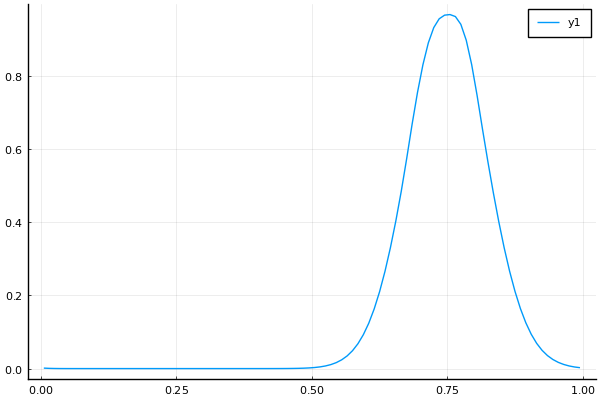

In [12]:
# first attempt at getting advection case same as from file
py"""
# solver
from clawpack import pyclaw
from clawpack import riemann
import numpy as np

solver = pyclaw.ClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.bc_lower[0] = pyclaw.BC.periodic
solver.bc_upper[0] = pyclaw.BC.periodic

# domain
x = pyclaw.Dimension(0.0,1.0,100,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = 1.  # Advection velocity

# initial condition
xc = state.grid.x.centers
beta = 100
gamma = 0
x0 = 0.75
state.q[0,:] = np.exp(-beta * (xc-x0)**2) * np.cos(gamma * (xc - x0))

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = 1.0
claw.output_style = 1
claw.num_output_times = 10
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)
"""

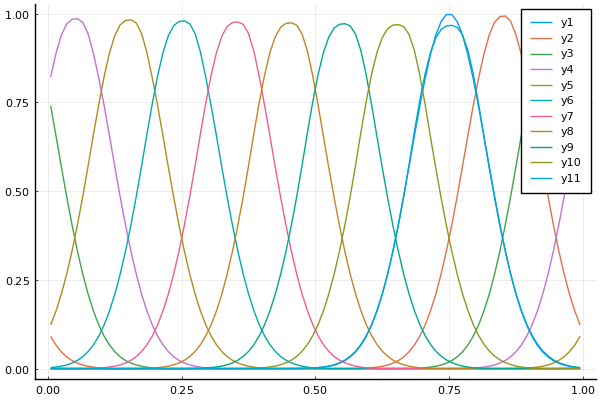

In [18]:
centers = py"claw.centers"
results = py"claw.frames"
p = plot()
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:])
end
p

In [22]:
# Try getting 5th order WENO scheme + 4th-order strong stability preserving method Ketcheson time integrator from SharpClaw
py"""

# solver
from clawpack import pyclaw
from clawpack import riemann
import numpy as np

solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'

solver.bc_lower[0] = pyclaw.BC.periodic
solver.bc_upper[0] = pyclaw.BC.periodic

# domain
x = pyclaw.Dimension(0.0,1.0,100,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = 1.  # Advection velocity

# initial condition
xc = state.grid.x.centers
beta = 100
gamma = 0
x0 = 0.75
state.q[0,:] = np.exp(-beta * (xc-x0)**2) * np.cos(gamma * (xc - x0))

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = 1.0
claw.output_style = 1
claw.num_output_times = 10
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)
"""

2022-09-02 10:49:56,920 INFO CLAW: Solution 0 computed for time t=0.000000
2022-09-02 10:49:56,936 INFO CLAW: Solution 1 computed for time t=0.100000
2022-09-02 10:49:56,945 INFO CLAW: Solution 2 computed for time t=0.200000
2022-09-02 10:49:56,954 INFO CLAW: Solution 3 computed for time t=0.300000
2022-09-02 10:49:56,965 INFO CLAW: Solution 4 computed for time t=0.400000
2022-09-02 10:49:56,973 INFO CLAW: Solution 5 computed for time t=0.500000
2022-09-02 10:49:56,985 INFO CLAW: Solution 6 computed for time t=0.600000
2022-09-02 10:49:56,993 INFO CLAW: Solution 7 computed for time t=0.700000
2022-09-02 10:49:57,001 INFO CLAW: Solution 8 computed for time t=0.800000
2022-09-02 10:49:57,009 INFO CLAW: Solution 9 computed for time t=0.900000
2022-09-02 10:49:57,018 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = /home/kkganko/FastAcc-HypNumSolver/_output 
  ov

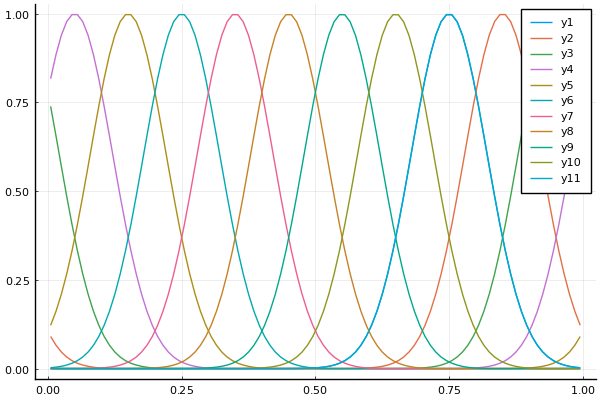

In [23]:
centers = py"claw.centers"
results = py"claw.frames"
p = plot()
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:])
end
p

In [28]:
py"help(solver.cfl)"

Help on CFL in module clawpack.pyclaw.cfl object:

class CFL(builtins.object)
 |  CFL(global_max)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, global_max)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_cached_max(self)
 |  
 |  get_global_max(self)
 |      Compute the maximum CFL number over all processes for the current step.
 |      
 |      This is used to determine whether the CFL condition was
 |      violated and adjust the timestep.
 |  
 |  set_global_max(self, new_global_max)
 |  
 |  set_local_max(self, new_local_max)
 |  
 |  update_global_max(self, new_local_max)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [29]:
# Now change the BCs to the desired ones: zero-order extrapolation at left/inflow, zero-order extrapolation at right/outflow
py"""

# solver
from clawpack import pyclaw
from clawpack import riemann
import numpy as np

solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'

solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap

# domain
x = pyclaw.Dimension(0.0,1.0,100,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = 1.  # Advection velocity

# initial condition
xc = state.grid.x.centers
beta = 100
gamma = 0
x0 = 0.75
state.q[0,:] = np.exp(-beta * (xc-x0)**2) * np.cos(gamma * (xc - x0))

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = 1.0
claw.output_style = 1
claw.num_output_times = 10
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""


2022-09-02 11:06:13,355 INFO CLAW: Solution 0 computed for time t=0.000000
2022-09-02 11:06:13,365 INFO CLAW: Solution 1 computed for time t=0.100000
2022-09-02 11:06:13,375 INFO CLAW: Solution 2 computed for time t=0.200000
2022-09-02 11:06:13,387 INFO CLAW: Solution 3 computed for time t=0.300000
2022-09-02 11:06:13,397 INFO CLAW: Solution 4 computed for time t=0.400000
2022-09-02 11:06:13,409 INFO CLAW: Solution 5 computed for time t=0.500000
2022-09-02 11:06:13,418 INFO CLAW: Solution 6 computed for time t=0.600000
2022-09-02 11:06:13,426 INFO CLAW: Solution 7 computed for time t=0.700000
2022-09-02 11:06:13,435 INFO CLAW: Solution 8 computed for time t=0.800000
2022-09-02 11:06:13,443 INFO CLAW: Solution 9 computed for time t=0.900000
2022-09-02 11:06:13,451 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /home/kkganko/FastAcc-HypNumSolver 
  rundir = /home/kkganko/FastAcc-HypNumSolver 
  outdir = /home/kkganko/FastAcc-HypNumSolver/_output 
  ov

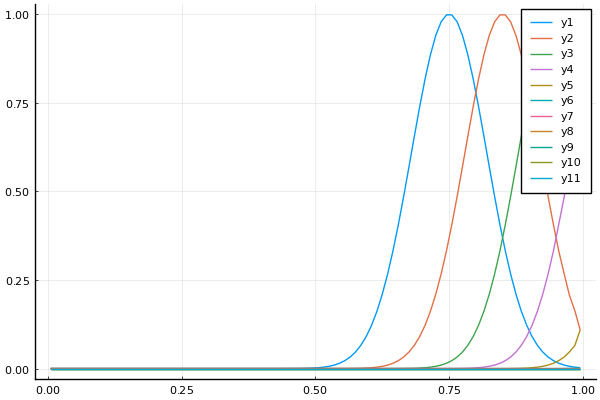

In [30]:
centers = py"claw.centers"
results = py"claw.frames"
p = plot()
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:])
end
p

# Define Helper Functions and Constants in Python #

In [38]:
# Change IC, growth rate, and domain to be closer to problem you are working with
py"""
import numpy as np
from scipy.stats import norm
from clawpack import pyclaw
from clawpack import riemann

m_c = 50.0 # critical fissioning cell mass, kg
sigma_m = 10.0 # fissioning cell mass spread, kg
M = 4*m_c # maximal mass possible by any cell, kg
dm_dx = M/2 # conversion ratio for linear transform to chebyshev domain, i.e., m=\in[0,M] -> x\in[-1,1], kg
mu_0 = 25.0 # initial cell mass distribution mean, kg
sigma_0 = np.sqrt(2.5) # initial cell mass distribution standard deviation, kg
k_0 = 2.0 # growth rate, kg/s
N_00 = 1.0e6 # initial number of total cells

# numerical parameters
tf = 100.0 # total time of simulating MOL or spectral coeff-based method, s
N_m = 1000 # number of grid points to select in mass domain


solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'

solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap

# domain
x = pyclaw.Dimension(0.0,M,N_m,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = k_0  # growth rate

# initial condition
xc = state.grid.x.centers
state.q[0,:] = N_00 * norm.pdf(xc, loc = mu_0 , scale = sigma_0)

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1
claw.num_output_times = int(tf)
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""

2022-09-02 11:20:39,213 INFO CLAW: Solution 0 computed for time t=0.000000
2022-09-02 11:20:39,230 INFO CLAW: Solution 1 computed for time t=1.000000
2022-09-02 11:20:39,246 INFO CLAW: Solution 2 computed for time t=2.000000
2022-09-02 11:20:39,260 INFO CLAW: Solution 3 computed for time t=3.000000
2022-09-02 11:20:39,273 INFO CLAW: Solution 4 computed for time t=4.000000
2022-09-02 11:20:39,287 INFO CLAW: Solution 5 computed for time t=5.000000
2022-09-02 11:20:39,299 INFO CLAW: Solution 6 computed for time t=6.000000
2022-09-02 11:20:39,313 INFO CLAW: Solution 7 computed for time t=7.000000
2022-09-02 11:20:39,326 INFO CLAW: Solution 8 computed for time t=8.000000
2022-09-02 11:20:39,338 INFO CLAW: Solution 9 computed for time t=9.000000
2022-09-02 11:20:39,351 INFO CLAW: Solution 10 computed for time t=10.000000
2022-09-02 11:20:39,365 INFO CLAW: Solution 11 computed for time t=11.000000
2022-09-02 11:20:39,377 INFO CLAW: Solution 12 computed for time t=12.000000
2022-09-02 11:20:39

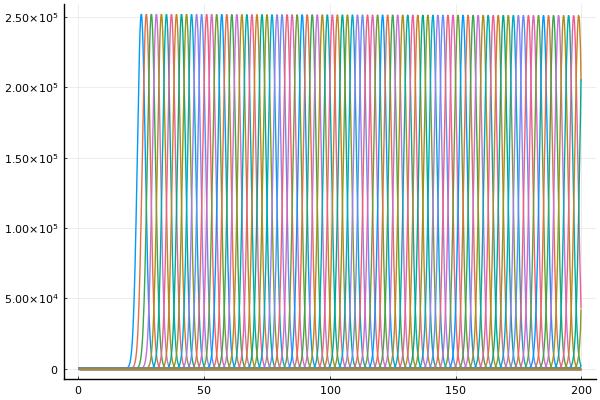

In [41]:
centers = py"claw.centers"
results = py"claw.frames"
p = plot()
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:], label = "")
end
p

In [77]:
# From Julia
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed
Gamma_m(m::Union{AbstractFloat,AbstractArray}, mu_m::AbstractFloat,sigma_m::AbstractFloat,k_0::AbstractFloat) = @. k_0 * N_pdf(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/sqrt(2))) # Γ(m), fission function in m-space
m_list = collect(range(0.0, py"M", length = py"N_m"))
jl_fissionrate = Gamma_m(m_list, py"m_c", py"sigma_m", py"k_0")
println(jl_fissionrate)

# Python implementation
py"""
import numpy as np
from scipy.stats import norm
from scipy.special import erf

m_list = np.linspace(0.0,M,num=N_m,endpoint=True)
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
Gamma_m_py = lambda m,mu_m,sigma_m,k_0 : k_0 * N_pdf_py(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/np.sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/np.sqrt(2)))
py_fissionrate = Gamma_m_py(m_list, m_c, sigma_m, k_0)
"""
py_fissionrate = py"py_fissionrate"

# comparison of output: calc 2-norm of the difference, error/vector residual
norm2d = sqrt(sum((jl_fissionrate .- py_fissionrate).^2)/length(jl_fissionrate))
println(norm2d)
println(py"len(py_fissionrate)")

[2.973439029468596e-7, 3.285828858097078e-7, 3.629583375148578e-7, 4.007693962855442e-7, 4.4234208395766e-7, 4.880315569111968e-7, 5.382245296092276e-7, 5.933418825236497e-7, 6.538414669026912e-7, 7.202211195387729e-7, 7.930219014270557e-7, 8.728315749648111e-7, 9.602883351299218e-7, 1.0560848108929249e-6, 1.160972353961057e-6, 1.2757656328242867e-6, 1.401347550971693e-6, 1.538674509071394e-6, 1.6887820318571825e-6, 1.8527907814395339e-6, 2.0319129797561117e-6, 2.227459263895998e-6, 2.4408459990706833e-6, 2.673603075061859e-6, 2.927382213048302e-6, 3.2039658108000552e-6, 3.505276355323917e-6, 3.833386433147682e-6, 4.190529369537725e-6, 4.5791105290517566e-6, 5.0017193109318886e-6, 5.461141873937995e-6, 5.960374626302884e-6, 6.50263851755396e-6, 7.091394169984912e-6, 7.730357888570166e-6, 8.423518589086774e-6, 9.175155685138134e-6, 9.989857975652012e-6, 1.0872543575245588e-5, 1.1828480930604813e-5, 1.2863310966703563e-5, 1.3983070407284512e-5, 1.5194216314524912e-5, 1.6503651893210773e-

 0.7849334541079899, 0.7717259142687981, 0.7573919283135306, 0.7419187024508744, 0.7253045778642748, 0.7075604707292129, 0.6887111470908212, 0.6687962482798407, 0.6478709829235534, 0.6260064073029595, 0.6032892276219913, 0.5798210758973836, 0.5557172417792261, 0.5311048681836269, 0.5061206573110347, 0.48090816554086147, 0.45561479374772085, 0.43038860757677194, 0.4053751288816002, 0.38071424649118063, 0.3565373845516024, 0.33296504347769906, 0.3101048067358895, 0.2880498688481451, 0.2668781083604713, 0.2466516966871876, 0.22741720460623466, 0.2092061460571612, 0.19203588555697684, 0.1759108242227911, 0.16082378295795152, 0.1467575005684957, 0.13368617755270898, 0.12157700318766541, 0.1103916190496117, 0.10008748121193446, 0.09061909810305317, 0.081939128050408, 0.07399933134815896, 0.066751377687368, 0.0601475148078922, 0.05414110807143607, 0.048687062980438775, 0.043742143832931416, 0.03926520174733635, 0.03521732568979702, 0.03156192873487123, 0.0282647811172566, 0.02529400039353538,

, 3.77372906508167e-36, 2.8668510449083496e-36, 2.1770353178918404e-36, 1.652539141857274e-36, 1.2539030809547415e-36, 9.51047302909048e-37, 7.210513616836297e-37, 5.464572832153966e-37, 4.139731463619603e-37, 3.1348304455308947e-37, 2.3729133301200333e-37, 1.79545957073377e-37, 1.3579860820404174e-37, 1.026693805401398e-37, 7.759120539044584e-38, 5.861516475670572e-38, 4.426224274212209e-38, 3.341048464004643e-38, 2.5209142281545467e-38, 1.9013378672777125e-38, 1.433462909934309e-38, 1.0802880128996835e-38, 8.138016913848353e-39, 6.128067684650066e-39, 4.6126919601949794e-39, 3.470653737020201e-39, 2.6103218267764475e-39, 1.962468782950814e-39, 1.4748144825356523e-39, 1.1078933727188097e-39, 8.319255634595696e-40, 6.244489056319692e-40, 4.685277111186116e-40, 3.5139824663272225e-40, 2.6344492225347658e-40, 1.9742675554846855e-40, 1.4789317040228216e-40, 1.1074296929683307e-40, 8.289152752771685e-41, 6.201975641528162e-41, 4.638482300350122e-41, 3.467749242528077e-41, 2.591465321598165

In [71]:
# Now add linear homogeneous source term, -Γ(m)N(m,t)
# for sharpclaw solver, need to format a function that outputs -ΔtΓ(m)N(m,t) to dq_src
# you should also store auxiliary values for Γ(m)

py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from clawpack import pyclaw
from clawpack import riemann

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters
m_c = 50.0 # critical fissioning cell mass, kg
sigma_m = 10.0 # fissioning cell mass spread, kg
M = 4*m_c # maximal mass possible by any cell, kg
dm_dx = M/2 # conversion ratio for linear transform to chebyshev domain, i.e., m=\in[0,M] -> x\in[-1,1], kg
mu_0 = 25.0 # initial cell mass distribution mean, kg
sigma_0 = np.sqrt(2.5) # initial cell mass distribution standard deviation, kg
k_0 = 2.0 # growth rate, kg/s
N_00 = 1.0e6 # initial number of total cells

# numerical parameters
tf = 100.0 # total time of simulating MOL or spectral coeff-based method, s
N_m = 1000 # number of grid points to select in mass domain

# setup helper functions + sharpclaw solver source term (classic solver requires different source form)
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
Gamma_m_py = lambda m,mu_m,sigma_m,k_0 : k_0 * N_pdf_py(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/np.sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/np.sqrt(2)))


def dq_linhom_src(solver,state,dt):
    
    gamma_m = state.aux[0,:]

    dq = np.empty(state.q.shape)
    dq[0,:] = -dt * gamma_m * state.q[0,:]

    return dq


# Sharpclaw solver with 5th order WENO + strong-stability preserving 4th order time integrator scheme (like RK4, called 'SSP104')
solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'
solver.dq_src = dq_linhom_src
solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap
solver.aux_bc_lower[0]=pyclaw.BC.extrap
solver.aux_bc_upper[0]=pyclaw.BC.extrap

# domain
m = pyclaw.Dimension(0.0,M,N_m,name='m')
domain = pyclaw.Domain(m)
num_aux=1
state = pyclaw.State(domain,solver.num_eqn,num_aux)

# parameters
state.problem_data['u'] = k_0  # growth rate

# initialize q and aux vars
mc = state.grid.m.centers
state.q[0,:] = N_00 * norm.pdf(mc, loc = mu_0 , scale = sigma_0)
state.aux[0,:] = Gamma_m_py(mc, m_c, sigma_m, k_0)

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1
claw.num_output_times = int(tf)
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""


2022-09-02 15:38:55,284 INFO CLAW: Solution 0 computed for time t=0.000000
2022-09-02 15:38:55,305 INFO CLAW: Solution 1 computed for time t=1.000000
2022-09-02 15:38:55,325 INFO CLAW: Solution 2 computed for time t=2.000000
2022-09-02 15:38:55,343 INFO CLAW: Solution 3 computed for time t=3.000000
2022-09-02 15:38:55,359 INFO CLAW: Solution 4 computed for time t=4.000000
2022-09-02 15:38:55,375 INFO CLAW: Solution 5 computed for time t=5.000000
2022-09-02 15:38:55,390 INFO CLAW: Solution 6 computed for time t=6.000000
2022-09-02 15:38:55,406 INFO CLAW: Solution 7 computed for time t=7.000000
2022-09-02 15:38:55,423 INFO CLAW: Solution 8 computed for time t=8.000000
2022-09-02 15:38:55,438 INFO CLAW: Solution 9 computed for time t=9.000000
2022-09-02 15:38:55,454 INFO CLAW: Solution 10 computed for time t=10.000000
2022-09-02 15:38:55,470 INFO CLAW: Solution 11 computed for time t=11.000000
2022-09-02 15:38:55,487 INFO CLAW: Solution 12 computed for time t=12.000000
2022-09-02 15:38:55

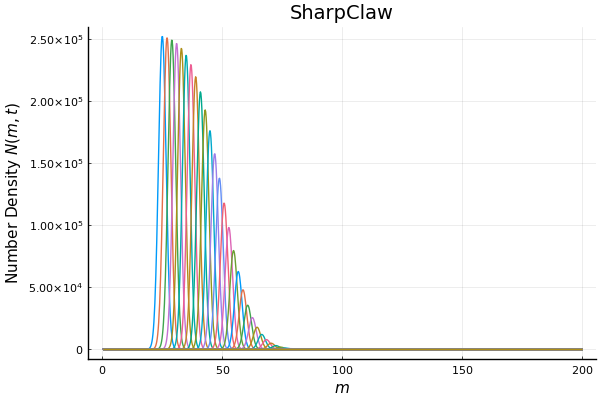

In [107]:
# show results and compare to the analytical values
centers = py"claw.centers"
results = py"claw.frames"
p = plot(title = "SharpClaw", xlabel = L"m", ylabel = L"Number Density $N(m,t)$")
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:], label = "")
end
p

For first generation, given an initial distribution of cells $n_0$ with arbitrary mass $m_0$, we have:

$$
n_1(m,t) = n_0(m-k_0t)\exp{}\left(-\int_0^t \Gamma(m-k_0t+k_0t')dt'\right),\newline
m_0 = m-k_0t
$$

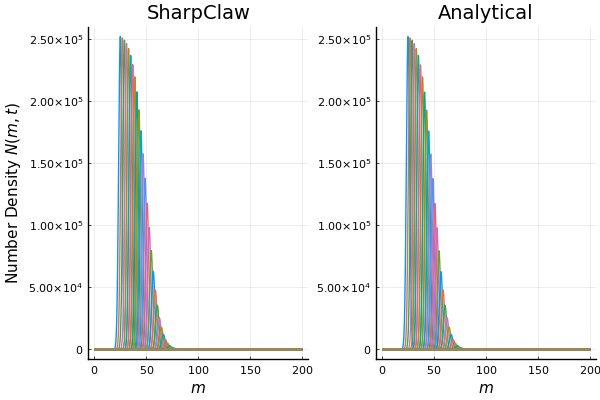

In [108]:
# helper functions
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed
Gamma_m(m::Union{AbstractFloat,AbstractArray}, mu_m::AbstractFloat,sigma_m::AbstractFloat,k_0::AbstractFloat) = @. k_0 * N_pdf(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/sqrt(2))) # Γ(m), fission function in m-space
function cumtrapz(X::AbstractVector, Y::AbstractVector)
    # Check matching vector length
    @assert length(X) == length(Y)
    
    # Initialize Output
    out = 0

    # Iterate over arrays
    @inbounds for i in 2:length(X)
        out += 0.5*(X[i] - X[i-1])*(Y[i] + Y[i-1])
    end
    # Return output
    return out
end

# compare to analytical
N_analytical_case2(m::AbstractFloat,t::AbstractFloat,k_0::AbstractFloat,delt::AbstractFloat,N_00::AbstractFloat,mu_0::AbstractFloat,
    sigma_0::AbstractFloat,m_c::AbstractFloat,sigma_m::AbstractFloat) = N_00 * N_pdf(m - (k_0*t),mu_0,sigma_0) *
    exp(-cumtrapz(0:delt:t,Gamma_m(m .- (k_0*t) .+ k_0.*(0:delt:t),m_c,sigma_m,k_0)))




t_list = collect(range(0.0, py"tf", length = Int(py"tf")+1))
delt = t_list[2] - t_list[1]
p_anal = plot(title = "Analytical", xlabel = L"m")

centers[1]
for ts in t_list
    anal_vec = [N_analytical_case2(m_j,ts,py"k_0",delt,py"N_00",py"mu_0",py"sigma_0",py"m_c",py"sigma_m") for m_j in centers[1]]
    plot!(p_anal,centers, anal_vec, label = "")
end
plot(p,p_anal, layout = grid(1,2))

## Linear homogenous term working! Try full source term now ##

How? You need to define the kernel function (a matrix) and multiply along the correct axis by the state, then apply trapz to obtain a vector of values. This depends on the current state value, so you will need to store the matrix as an auxiliary var. Is this possible?

Also, you will need to create python functions that are equivalent to Julia implementations for the kernel function / matrix generation, as well as cumptrapz!

# Solution: use matrix of aux values where `num_aux = length(K(x,x'))` #

Julia trapz: 30.12999678760505
Julia partition func:
Sum of absolute element-wise error: -1.4723110436200177e-12
Sum of absolute element-wise error: 1.6914105015279256e-12
Python trapz: 30.12999678836271


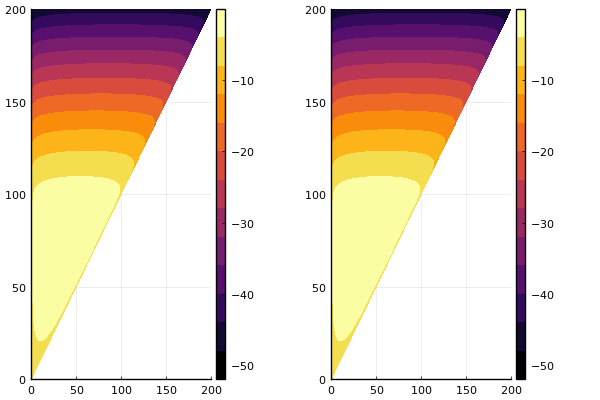

In [195]:
# get correct integral kernel implementation
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed
Gamma_m(m::Union{AbstractFloat,AbstractArray}, mu_m::AbstractFloat,sigma_m::AbstractFloat,k_0::AbstractFloat) = @. k_0 * N_pdf(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/sqrt(2))) # Γ(m), fission function in m-space

function sym2Dbeta_m!(p_mm_mat::LowerTriangular{Float64, Matrix{Float64}},m::AbstractArray,q::Int, ind::Vector{CartesianIndex{2}}=[CartesianIndex(j,i) for i in 1:length(m) for j in max(2,i):length(m)])
    @assert size(p_mm_mat,1) == size(p_mm_mat,2) == length(m)
    beta_coeff = SpecialFunctions.beta(q,q)

    # multithreaded loop
    @inbounds Threads.@threads for i in 1:length(ind)
        index  = ind[i]
        n1 = index[1]
        n2 = index[2]
        ratio = m[n1] / m[n2]
        p_mm_mat[n2,n1] = 1 / beta_coeff / m[n2] * ( ratio )^(q-1) * (1 - ratio )^(q-1)
    end
    p_mm_mat[:,1] .= 0.0 # if on first mass node = 0, daughter cell mass = 0 for all mother cell mass possible
    return p_mm_mat
end

function cumtrapz(X::AbstractVector, Y::AbstractVector)
    # Check matching vector length
    @assert length(X) == length(Y)
    
    # Initialize Output
    out = 0

    # Iterate over arrays
    @inbounds for i in 2:length(X)
        out += 0.5*(X[i] - X[i-1])*(Y[i] + Y[i-1])
    end
    # Return output
    return out
end

# initialize grid
m_list = collect(range(0.0,py"M",length = py"N_m")) # equally spaced mass nodes
jl_fissionrate = Gamma_m(m_list, py"m_c", py"sigma_m", py"k_0")
q = 3
jl_p_mm = LowerTriangular(zeros(py"N_m",py"N_m"))
ind = [CartesianIndex(i,j) for i in 1:py"N_m" for j in max(2,i):py"N_m"] # lower triangular indices prepared
sym2Dbeta_m!(jl_p_mm, m_list, q, ind)

println("Julia trapz: $(cumtrapz(m_list, jl_fissionrate))")
println("Julia partition func:")
# display(jl_p_mm)

kernel_m_jl = (jl_fissionrate * ones(py"N_m")') .* (jl_p_mm) # mother cell info on columns


py"""
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

# python helper functions
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
Gamma_m_py = lambda m,mu_m,sigma_m,k_0 : k_0 * N_pdf_py(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/np.sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/np.sqrt(2)))
sym2Dbeta_m_OLD = lambda m1,m2,q : (1 / beta(q,q) / m2 * ( m1 / m2 )**(q-1) * (1 - m1 / m2 )**(q-1)) if m1 < m2 else 0.0
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)

m_list = np.linspace(0.0,M,num=N_m,endpoint=True)
m_list_c = (m_list + (m_list[1] - m_list[0])/2)[0:-2]
#delm_list = m_list[1:-1] - m_list[0:-2]
delm_list = (m_list[1] - m_list[0]) * np.ones(len(m_list_c))
py_fissionrate = Gamma_m_py(m_list, m_c, sigma_m, k_0)
print("Python trapz:", midpt_trapz(delm_list,Gamma_m_py(m_list_c, m_c, sigma_m, k_0)))

q=3
p_mm_py = np.zeros((N_m,N_m))

for j in np.arange(0,N_m):
    for i in np.arange(0,N_m):
        p_mm_py[j,i] = sym2Dbeta_m_OLD(m_list[i],m_list[j],q)

# want outer product of column vector and row vector to make kernel matrix
# see https://stackoverflow.com/questions/29163126/multiplying-column-and-row-vectors-in-numpy
kernel_m_py = np.multiply(np.outer(py_fissionrate, np.ones(N_m)), p_mm_py) # mother cell info on columns


"""

py_p_mm = py"p_mm_py"
println("Sum of absolute element-wise error: $(sum((jl_p_mm .- py_p_mm)))")
p_partfunc_jl = contourf(m_list, m_list, log10.(jl_p_mm))
p_partfunc_py = contourf(m_list, m_list, log10.(py_p_mm))
p_comparison_partfunc = plot(p_partfunc_jl,p_partfunc_py, layout = grid(1,2))

kernel_m_py = py"kernel_m_py"
println("Sum of absolute element-wise error: $(sum((kernel_x_jl .- kernel_x_py)))")
p_kernel_jl = contourf(m_list, m_list, log10.(kernel_m_jl))
p_kernel_py = contourf(m_list, m_list, log10.(kernel_m_py))
p_comparison_kernel = plot(p_kernel_jl, p_kernel_py, layout = grid(1,2))

## 09/05/22 ##

To be specific, we are using PyClaw's SharpClaw solvers to solve the following IPDE:

$$
\frac{\partial N(t,m)}{\partial t} + k_0\frac{\partial N(t,m)}{\partial m} = 2\int_m^{M}\Gamma(m')p(m,m')N(t,m')dm' - \Gamma(m)N(t,m) = \Psi(t,m,N),\newline \textrm{IC: }N(0,m) = N_0(m), 
\newline \textrm{Regularity condition/inflow BC: } G(t,0)N(t,0) = \lim_{m\to M} G(t,m)N(t,m) = 0
$$

where

$$
h'(m) = \frac{1}{\sigma_c\sqrt{2\pi}}\exp{\left(\frac{-(m-m_c)^2}{2\sigma_c^2}\right)}\newline
\Gamma(m) = \frac{k_0h'(m)}{1-\int_0^m h'(m')dm'}\newline
p(m,m')=\frac{1}{B(q,q)}\frac{1}{m'}\left(\frac{m}{m'}\right)^{q-1}\left(1-\frac{m}{m'}\right)^{q-1}
$$

In [209]:
# try implementing general source term

py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

from clawpack import pyclaw
from clawpack import riemann

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters
m_c = 50.0 # critical fissioning cell mass, kg
sigma_m = 10.0 # fissioning cell mass spread, kg
M = 4*m_c # maximal mass possible by any cell, kg
dm_dx = M/2 # conversion ratio for linear transform to chebyshev domain, i.e., m=\in[0,M] -> x\in[-1,1], kg
mu_0 = 25.0 # initial cell mass distribution mean, kg
sigma_0 = np.sqrt(2.5) # initial cell mass distribution standard deviation, kg
k_0 = 2.0 # growth rate, kg/s
N_00 = 1.0e6 # initial number of total cells
q = 3 # symmetric 2d beta pdf shape factor for partition function

# numerical parameters
tf = 100.0 # total time of simulating MOL or spectral coeff-based method, s
N_m = 1000 # number of grid points to select in mass domain

# setup helper functions + sharpclaw solver source term (classic solver requires different source form)
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
Gamma_m_py = lambda m,mu_m,sigma_m,k_0 : k_0 * N_pdf_py(m, mu_m, sigma_m)/(1 - 0.5 * erf((m - mu_m)/sigma_m/np.sqrt(2)) + 0.5 * erf(-mu_m/sigma_m/np.sqrt(2)))
sym2Dbeta_m_OLD = lambda m1,m2,q : (1 / beta(q,q) / m2 * ( m1 / m2 )**(q-1) * (1 - m1 / m2 )**(q-1)) if m1 < m2 else 0.0
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)

def kernel_mat(m_list,N_m,q,fission_rate):

    p_mm = np.zeros((N_m,N_m))

    for j in np.arange(0,N_m):
        for i in np.arange(0,N_m):
            p_mm[j,i] = sym2Dbeta_m_OLD(m_list[i],m_list[j],q)
    
    kernel_m = np.multiply(np.outer(fission_rate, np.ones(N_m)), p_mm) # mother cell info on columns
    
    return kernel_m

def dq_linhom_src(solver,state,dt):
    
    q = state.q[0,:]
    gamma_m = state.aux[0,:]
    mc = state.grid.m.centers
    del_mc_list = np.multiply(np.ones(len(mc)), (mc[1]-mc[0]))

    F = np.zeros(N_m)
    for i in range(1,N_m):
        F[i] = midpt_trapz(del_mc_list, np.multiply(state.aux[i,:], q))

    dq = np.empty(state.q.shape)
    dq[0,:] = dt * (-gamma_m * q + 2.0 * F)

    return dq

# Sharpclaw solver with 5th order WENO + strong-stability preserving 4th order time integrator scheme (like RK4, called 'SSP104')
solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'
solver.dq_src = dq_linhom_src
solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap
solver.aux_bc_lower[0]=pyclaw.BC.extrap
solver.aux_bc_upper[0]=pyclaw.BC.extrap

# domain
m = pyclaw.Dimension(0.0,M,N_m,name='m')
domain = pyclaw.Domain(m)
num_aux=1+N_m
state = pyclaw.State(domain,solver.num_eqn,num_aux)

# parameters
state.problem_data['u'] = k_0  # growth rate

# initialize q and aux vars
mc = state.grid.m.centers
fission_rate = Gamma_m_py(mc, m_c, sigma_m, k_0)
kernel_m = kernel_mat(mc,N_m,q,fission_rate)
state.q[0,:] = N_00 * norm.pdf(mc, loc = mu_0 , scale = sigma_0)
state.aux[0,:] = fission_rate
for i in range(1,N_m):
    state.aux[i,:] = kernel_m[:,i]

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1
claw.num_output_times = int(tf)
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""



2022-09-07 17:31:16,979 INFO CLAW: Solution 0 computed for time t=0.000000
2022-09-07 17:31:17,581 INFO CLAW: Solution 1 computed for time t=1.000000
2022-09-07 17:31:18,118 INFO CLAW: Solution 2 computed for time t=2.000000
2022-09-07 17:31:18,719 INFO CLAW: Solution 3 computed for time t=3.000000
2022-09-07 17:31:19,463 INFO CLAW: Solution 4 computed for time t=4.000000
2022-09-07 17:31:20,118 INFO CLAW: Solution 5 computed for time t=5.000000
2022-09-07 17:31:20,814 INFO CLAW: Solution 6 computed for time t=6.000000
2022-09-07 17:31:21,514 INFO CLAW: Solution 7 computed for time t=7.000000
2022-09-07 17:31:22,192 INFO CLAW: Solution 8 computed for time t=8.000000
2022-09-07 17:31:23,087 INFO CLAW: Solution 9 computed for time t=9.000000
2022-09-07 17:31:23,841 INFO CLAW: Solution 10 computed for time t=10.000000
2022-09-07 17:31:24,662 INFO CLAW: Solution 11 computed for time t=11.000000
2022-09-07 17:31:25,626 INFO CLAW: Solution 12 computed for time t=12.000000
2022-09-07 17:31:26

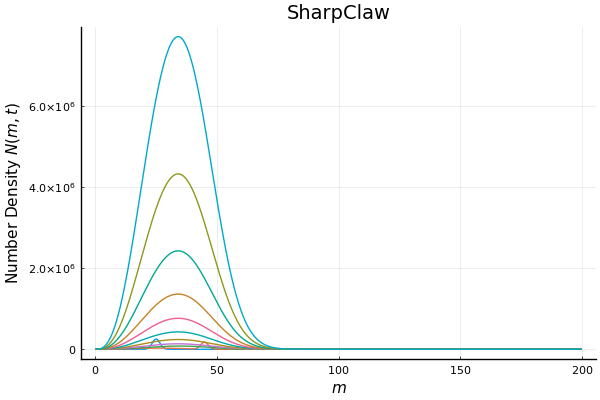

In [211]:
# show results and compare to the analytical values
centers = py"claw.centers"
results = py"claw.frames"
p = plot(title = "SharpClaw", xlabel = L"m", ylabel = L"Number Density $N(m,t)$")
for i in 1:10:length(results)
#     print(i)
    plot!(p,centers,results[i].q[1,:], label = "")
end
p

## 09/07/22 ##

Now we will solve the following aerosols IPDE:

$$
\frac{\partial n(v,t)}{\partial t} + \sigma_0\frac{\partial(n(v,t))}{\partial v} = \frac{\beta_0}{2}\int_0^{v} n(v-v',t)n(v',t)dv' - \beta_0 n(v,t) \int_0^{\infty} n(v',t)dv'\newline
n(v,0) = n_0(v) = \frac{N_0}{v_0}\exp{}\left(-\frac{v}{v_0}\right),~~n(0,t) = 0
$$

Analytical Solution given by piecewise function definition after implementing the Dirichlet inflow BC:

$$
n(v,t) = 
\begin{cases}
\frac{M_0^2}{M_1\left(1-2\Lambda v_0 \left(\frac{N_0-M_0}{M_1}\right)\right)}\exp{}\left(-\frac{M_0 \left(v-2\Lambda v_0\left(\frac{N_0}{M_0}-1\right)\right)}{M_1\left(1-2\Lambda v_0 \left(\frac{N_0-M_0}{M_1}\right)\right)}\right)  & v-\sigma_0 t > 0 \\
0 & v-\sigma_0 t \leq 0 
\end{cases}
\newline
~~M_0=\frac{2N_0}{2+\beta_0 N_0 t},~~M_1=N_0 v_0\left(1 - \frac{2\sigma_0}{\beta_0 N_0 v_0}\ln{}\left(\frac{M_0}{N_0}\right)\right),~~\Lambda = \frac{\sigma_0}{\beta_0 N_0 v_0}
$$

The following parameter values are used, as presented in Gunawan 2008:

$$
\Delta t = 10^{-5},~~\Delta x = 10^{-3},\newline
N_0 = 100,~~v_0 = 1,~~\beta_0 = 1,~~\sigma_0 = 1
$$

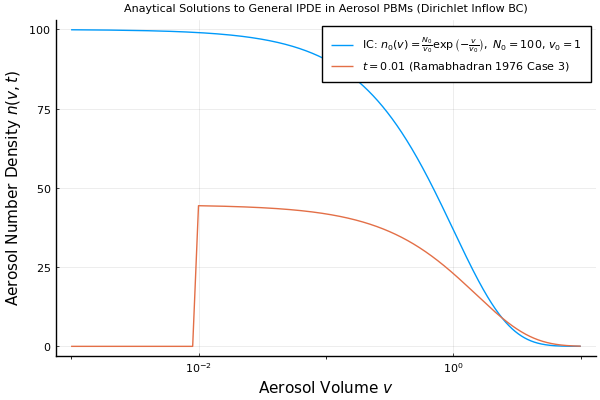

In [9]:
# define parameters, numerical and physical
tf = 0.01
delt = 1e-5
delv = 1e-3
V = 10 # domain truncation, maximal aerosol volume
N_0 = 100
v_0 = 1
β_0 = 1
σ_0 = 1
t_list = collect(0:delt:tf)
v_list = collect(0:delv:V)

# plot IC
compare_anal_PBE_p = plot(v_list[2:end], N_0/v_0 .* exp.(-v_list[2:end] ./ v_0), xaxis = :log, 
                            label = L"IC: $n_0(v)=\frac{N_0}{v_0}\exp{}\left(-\frac{v}{v_0}\right),~N_0=$%$(N_0), $v_0=$%$(v_0)",
                            xlabel = L"Aerosol Volume $v$", ylabel = L"Aerosol Number Density $n(v,t)$",
                            title = "Anaytical Solutions to General IPDE in Aerosol PBMs (Dirichlet Inflow BC)",
                            titlefontsize = 8)

# define analytical functions
soln_Ramabhadran1976_Case3 = []

Λ_R_case3 = σ_0 / β_0 / N_0 / v_0 
M_0_funcCase3(N_0, τ) = 2 * N_0 / (2 + τ)
M_1_funcCase3(N_0, v_0, τ, Λ_R) = N_0 * v_0 * (1 - 2 * Λ_R * log(2 / (2 + τ)))
n_Ramabhadran1976_case3(v,N_0,v_0,Λ_R,M_0,M_1) = @. M_0^2 / M_1 / (1 - 2 * Λ_R * v_0 * (N_0 - M_0) / M_1) * 
                                                    exp(-M_0 / M_1 / (1 - 2 * Λ_R * v_0 * (N_0 - M_0) / M_1) *
                                                    (v - 2 * Λ_R * v_0 * (N_0/M_0 - 1)))

# simulate
for τ in (t_list .* β_0 * N_0)
    # get Ramabhadran 1976 Case 3 solution for constant growth, const coalescence
    M_0_case3 = M_0_funcCase3(N_0, τ)
    M_1_case3 = M_1_funcCase3(N_0, v_0, τ, Λ_R_case3)
    push!(soln_Ramabhadran1976_Case3, n_Ramabhadran1976_case3(v_list, N_0, v_0, Λ_R_case3, M_0_case3, M_1_case3))
end

# plot, but remember that with BC = 0 at inflow, you need to define the solution front to move with characteristic speed
# i.e., if you define domain as [Δv, V], you will have solution = 0 for v_list - \sigma_0 t < 0
plot!(compare_anal_PBE_p, v_list[2:end], soln_Ramabhadran1976_Case3[end][2:end] .* ifelse.((v_list[2:end] .- (σ_0 .* tf)) .< 0, 0, 1), label = L"$t=$%$(t_list[end]) (Ramabhadran 1976 Case 3) ")

## For PyClaw implementation, don't need any aux vars because integral kernels only depend on the number density of the aerosol population (already stored in q vector) ##

In [31]:
# with zero-order extrapolation on an additional ghost node before inflow node
py"""
# import relevant packages
import numpy as np

from clawpack import pyclaw
from clawpack import riemann

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters
V = 10 # domain truncation, maximal aerosol volume, μm^3
N_0 = 100 # total number of particles at start
v_0 = 1 # mean volume of initial particle distribution
β_0 = 1 # coalescence/collision rate, 1/s
σ_0 = 1 # condensation rate, μm^3/s

# numerical parameters
delt = 1e-5 # timestep, s
delv = 1e-3 # volume of aerosol grid discretization, μm^3
tf = 0.01 # final time of simulation, s
N_v = round(V/delv)+1 # number of grid points to select in mass domain, add one ghost node additionally to deal with advecting inflow BC properly

# setup helper functions + sharpclaw solver source term (classic solver requires different source form)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)

def dq_collision_src(solver,state,dt):
    
    q = state.q[0,:]
    vc = state.grid.v.centers
    del_vc_list = np.multiply(np.ones(len(vc)), (vc[1]-vc[0]))

    F = np.zeros(N_v)
    # the following trick only works for evenly-spaced gridding
    for i in range(0,N_v-1):
        # collision kernel first version computed with 0-padding // second version without (lower flops)
        #coll_kernel = np.append(np.multiply(q[0:i+1], q[i+1:0:-1]),np.zeros(N_v-i-1))
        #F[i] = midpt_trapz(del_vc_list, coll_kernel)
        coll_kernel = np.multiply(q[0:i+1], q[i+1:0:-1])
        F[i] = midpt_trapz(del_vc_list[0:i+1], coll_kernel)

    dq = np.empty(state.q.shape)
    dq[0,:] = dt * β_0 * ( 1/2 * F - (q * np.ones(len(vc)) * midpt_trapz(del_vc_list,q)))

    return dq

# Sharpclaw solver with 5th order WENO + strong-stability preserving 4th order time integrator scheme (like RK4, called 'SSP104')
solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'
solver.dq_src = dq_collision_src
solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap

# domain
v = pyclaw.Dimension(-delv,V,N_v,name='v')
domain = pyclaw.Domain(v)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = σ_0  # growth rate

# initialize q and aux vars
vc = state.grid.v.centers
state.q[0,:] = N_0/v_0 * np.exp(-vc/v_0)
state.q[0,0] = 0

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1
claw.num_output_times = 10
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""


2022-09-09 08:35:40,431 INFO CLAW: Solution 0 computed for time t=0.000000
hi this is me
2022-09-09 08:35:41,581 INFO CLAW: Solution 1 computed for time t=0.001000
hi this is me
2022-09-09 08:35:42,826 INFO CLAW: Solution 2 computed for time t=0.002000
hi this is me
2022-09-09 08:35:44,149 INFO CLAW: Solution 3 computed for time t=0.003000
hi this is me
2022-09-09 08:35:45,550 INFO CLAW: Solution 4 computed for time t=0.004000
hi this is me
2022-09-09 08:35:46,872 INFO CLAW: Solution 5 computed for time t=0.005000
hi this is me
2022-09-09 08:35:48,209 INFO CLAW: Solution 6 computed for time t=0.006000
hi this is me
2022-09-09 08:35:49,588 INFO CLAW: Solution 7 computed for time t=0.007000
hi this is me
2022-09-09 08:35:50,947 INFO CLAW: Solution 8 computed for time t=0.008000
hi this is me
2022-09-09 08:35:52,343 INFO CLAW: Solution 9 computed for time t=0.009000
hi this is me
2022-09-09 08:35:53,714 INFO CLAW: Solution 10 computed for time t=0.010000
Controller attributes:
  xdir = /h

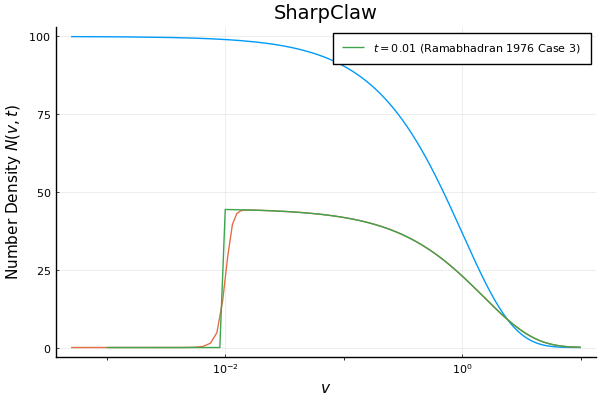

In [32]:
# show results and compare to the analytical values
centers = py"claw.centers"
results = py"claw.frames"
p = plot(title = "SharpClaw", xlabel = L"v", ylabel = L"Number Density $N(v,t)$", xaxis = :log)
# for i in 1:10:length(results)
# #     print(i)
#     plot!(p,centers[1][2:end],results[i].q[1,2:end], label = "")
# end
plot!(p,centers[1][2:end],results[1].q[1,2:end], label = "")
plot!(p,centers[1][2:end],results[end].q[1,2:end], label = "")
plot!(p, v_list[2:end], soln_Ramabhadran1976_Case3[end][2:end] .* ifelse.((v_list[2:end] .- (σ_0 .* tf)) .< 0, 0, 1), label = L"$t=$%$(t_list[end]) (Ramabhadran 1976 Case 3) ")

In [25]:
# with periodic BC + an additional ghost node after outflow set to 0
py"""
# import relevant packages
import numpy as np

from clawpack import pyclaw
from clawpack import riemann

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters
V = 10 # domain truncation, maximal aerosol volume, μm^3
N_0 = 100 # total number of particles at start
v_0 = 1 # mean volume of initial particle distribution
β_0 = 1 # coalescence/collision rate, 1/s
σ_0 = 1 # condensation rate, μm^3/s

# numerical parameters
delt = 1e-5 # timestep, s
delv = 1e-3 # volume of aerosol grid discretization, μm^3
tf = 0.01 # final time of simulation, s
N_v = round(V/delv)+1 # number of grid points to select in mass domain, add one ghost node additionally to deal with advecting inflow BC properly

# setup helper functions + sharpclaw solver source term (classic solver requires different source form)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)

def dq_collision_src(solver,state,dt):
    
    q = state.q[0,:]
    vc = state.grid.v.centers
    del_vc_list = np.multiply(np.ones(len(vc)), (vc[1]-vc[0]))

    F = np.zeros(N_v)
    # the following trick only works for evenly-spaced gridding
    for i in range(0,N_v-1):
        # collision kernel first version computed with 0-padding // second version without (lower flops)
        #coll_kernel = np.append(np.multiply(q[0:i+1], q[i+1:0:-1]),np.zeros(N_v-i-1))
        #F[i] = midpt_trapz(del_vc_list, coll_kernel)
        coll_kernel = np.multiply(q[0:i+1], q[i+1:0:-1])
        F[i] = midpt_trapz(del_vc_list[0:i+1], coll_kernel)

    dq = np.empty(state.q.shape)
    dq[0,:] = dt * β_0 * (1/2 * F - (q * np.ones(len(vc)) * midpt_trapz(del_vc_list,q)))

    return dq

# Sharpclaw solver with 5th order WENO + strong-stability preserving 4th order time integrator scheme (like RK4, called 'SSP104')
solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'
solver.dq_src = dq_collision_src
solver.bc_lower[0] = pyclaw.BC.periodic
solver.bc_upper[0] = pyclaw.BC.periodic

# domain
v = pyclaw.Dimension(0,V,N_v,name='v')
domain = pyclaw.Domain(v)
state = pyclaw.State(domain,solver.num_eqn)

# parameters
state.problem_data['u'] = σ_0  # growth rate

# initialize q and aux vars
vc = state.grid.v.centers
state.q[0,:] = N_0/v_0 * np.exp(-vc/v_0)
state.q[0,-1] = 0

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1
claw.num_output_times = 10
# claw.verbosity = 0

# run
status = claw.run()
print(claw)
print(solver.kernel_language)

"""


2022-09-09 00:29:47,071 INFO CLAW: Solution 0 computed for time t=0.000000
hi this is me
2022-09-09 00:29:55,967 INFO CLAW: Solution 1 computed for time t=0.001000
hi this is me
2022-09-09 00:30:04,137 INFO CLAW: Solution 2 computed for time t=0.002000
hi this is me
2022-09-09 00:30:13,795 INFO CLAW: Solution 3 computed for time t=0.003000
hi this is me
2022-09-09 00:30:28,000 INFO CLAW: Solution 4 computed for time t=0.004000
hi this is me
2022-09-09 00:30:38,277 INFO CLAW: Solution 5 computed for time t=0.005000
hi this is me
2022-09-09 00:30:45,343 INFO CLAW: Solution 6 computed for time t=0.006000
hi this is me
2022-09-09 00:30:54,346 INFO CLAW: Solution 7 computed for time t=0.007000
hi this is me
2022-09-09 00:31:03,186 INFO CLAW: Solution 8 computed for time t=0.008000
hi this is me
2022-09-09 00:31:16,212 INFO CLAW: Solution 9 computed for time t=0.009000
hi this is me
2022-09-09 00:31:26,288 INFO CLAW: Solution 10 computed for time t=0.010000
Controller attributes:
  xdir = /h

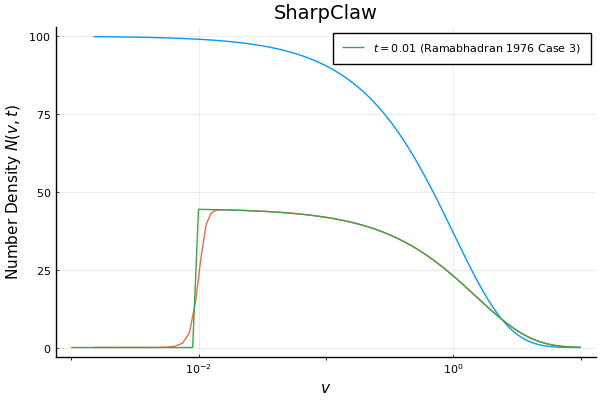

In [26]:
# show results and compare to the analytical values
centers = py"claw.centers"
results = py"claw.frames"
p = plot(title = "SharpClaw", xlabel = L"v", ylabel = L"Number Density $N(v,t)$", xaxis = :log)
# for i in 1:10:length(results)
# #     print(i)
#     plot!(p,centers[1][2:end],results[i].q[1,2:end], label = "")
# end
plot!(p,centers[1][2:end],results[1].q[1,2:end], label = "")
plot!(p,centers[1][2:end],results[end].q[1,2:end], label = "")
plot!(p, v_list[2:end], soln_Ramabhadran1976_Case3[end][2:end] .* ifelse.((v_list[2:end] .- (σ_0 .* tf)) .< 0, 0, 1), label = L"$t=$%$(t_list[end]) (Ramabhadran 1976 Case 3) ")

In [41]:
py"""
Lx = 10
n = 20
x = np.arange(-1,1, 0.01)
IC = np.log(1 + np.cosh(n)**2/np.cosh(n*(x-0.2*Lx))**2) / (2*n)
"""

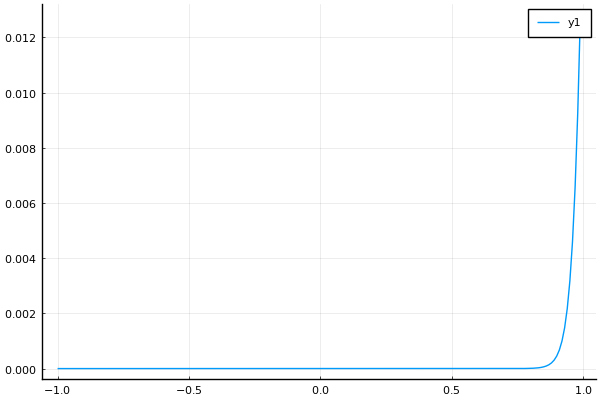

In [42]:
x_grid = py"x"
y_test = py"IC"

plot(x_grid, y_test)

In [38]:
y_test

1-element Vector{Float64}:
 0.0